# LINEAR REGRESSION

0.9879233182220009


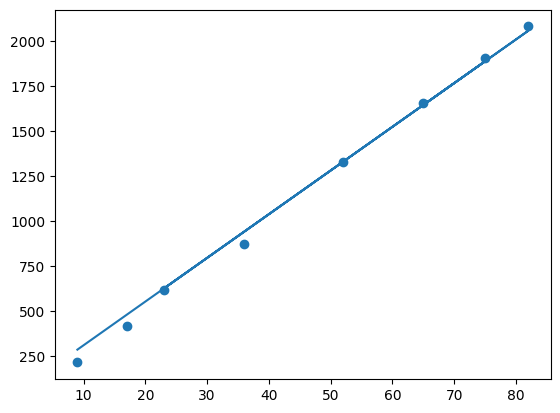

In [1]:
"""'''LINEAR REGRESSION WORKING'''"""
import numpy as np
from statistics import mean
from matplotlib import pyplot as plt

def train_test_split(x, y, test_size, shuffle= True):
  x= np.array(x)
  y= np.array(y)
  if test_size > 1:
    test_size= int(test_size* len(x))
  if shuffle== True:
    indices= np.arange(len(x))
    np.random.shuffle(indices)
    x= x[indices]
    y= y[indices]
  test_size= int(len(x)* (1- test_size))
  x_train= x[:test_size]
  x_test= x[test_size:]
  y_train= y[:test_size]
  y_test= y[test_size:]
  return x_train, x_test, y_train, y_test

class LinearRegression:
  def __init__(self):
    self.m= None
    self.b= None

  def fit(self, x_train, y_train):
    self.m= (((mean(x_train)* mean(y_train))- mean(x_train* y_train))/
        ((mean(x_train)* mean(x_train))- mean(x_train* x_train)))
    self.b= mean(y_train)- (self.m* mean(x_train))

  def sqr_err(self, y_train, y_pred):
    return sum((y_train- y_pred)**2)

  def predict(self, x_test):
    return [self.m*x+ self.b for x in x_test]

  def score(self, x_test, y_test):
    y_pred= self.predict(x_test)
    y_mean= [mean(y_test) for _ in y_test]
    sqr_err_reg= self.sqr_err(y_test, y_pred)
    sqr_err_ymean= self.sqr_err(y_test, y_mean)
    return 1- (sqr_err_reg/ sqr_err_ymean)

dataset = {"x":[9, 17, 23, 36, 48, 52, 65, 75, 82, 96],
           "y":[215, 415, 615, 870, 1140, 1330, 1655, 1905, 2080, 2370]}
x= np.array(dataset["x"])
y= np.array(dataset["y"])

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2)
model= LinearRegression()
model.fit(x_train, y_train)
acc= model.score(x_test, y_test)
print(acc)
prediction= model.predict(x_train)
plt.scatter(x_train, y_train)
plt.plot(x_train, prediction)
plt.show()

0.9450531833637371


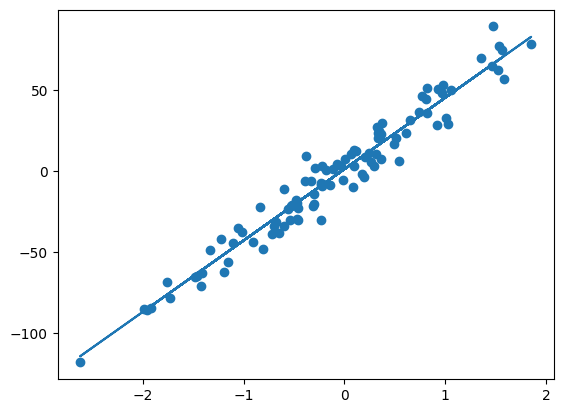

In [2]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt

x, y= make_regression(n_samples= 100, n_features= 1, noise= 10, random_state= 42)
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2)
model= LinearRegression()
model.fit(x_train, y_train)
acc= model.score(x_test, y_test)
print(acc)
pred= model.predict(x)
plt.scatter(x, y)
plt.plot(x, pred)
plt.show()

dataset:
     x   y     z
0   9   8   215
1  17  16   415
2  23  27   615
3  36  33   870
4  48  42  1140
5  52  55  1330
6  65  68  1655
7  75  78  1905
8  82  85  2080
9  96  93  2370

accuracy:1.0

870.0 -- 870
2370.0 -- 2370
mean absolute error: 0.0
mean squared error: 0.0
r2 score: 1.0
[ 980. 1775.]


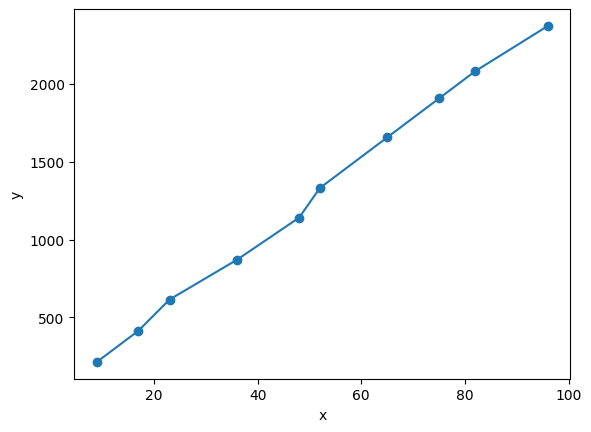

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as abs_err
from sklearn.metrics import mean_squared_error as sqr_err
from sklearn.metrics import r2_score as r2
import matplotlib.pyplot as plt
from matplotlib import style

style.use("default")
"""formula -- z = 15x + 10y
remember, unique pattern of input have to be given to train the model
input always is in 2d array"""
dataset = {"x":[9, 17, 23, 36, 48, 52, 65, 75, 82, 96],
           "y":[8, 16, 27, 33, 42, 55, 68, 78, 85, 93],
           "z":[215, 415, 615, 870, 1140, 1330, 1655, 1905, 2080, 2370]}
data = pd.DataFrame(dataset)
print(f"dataset:\n {data}\n")
x = np.array(data[["x","y"]])
y = np.array(data["z"])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
model= LinearRegression()
model.fit(x_train, y_train)

accuracy = model.score(x_test, y_test)
print(f"accuracy:{accuracy}\n")

model_prediction = model.predict(x_test)
for i, pred in enumerate(model_prediction):
  print(round(pred, 2),"--",y_test[i])
y_pred= model.predict(x_train)
print("mean absolute error:", abs_err(y_test, model_prediction))
print("mean squared error:", sqr_err(y_test, model_prediction))
print("r2 score:", r2(y_test, model_prediction))

"""       [x , y]"""
input1 = [26, 59]
input2 = [93, 38]

prediction = model.predict([input1, input2])
print(prediction)
predict= model.predict(x)
plt.scatter(data[["x"]], data["z"])
plt.plot(data[["x"]], predict)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

data= {"speed": [0.4, 0.7, 0.5, 0.8, 0.6, 0.3, 0.9, 0.5, 0.8, 0.2],
       "strength": [0.7, 0.3, 0.5, 0.7, 0.9, 0.8, 0.5, 0.2, 0.7, 0.6],
       "age": [13, 15, np.nan, 16, 14, 18, np.nan, 19, 14, 15],
       "height": ["medium", "tall", "medium", "short", "short",
                  "medium", "short", "tall", "tall", "medium"],
       "weight": ["under", "medium", "medium", "under", "over",
                  "over", "under", "under", "over", "medium"],
       "rank": [77.98, 85.32, 87.36, 90.39, 81.83,
                102.26, 86.77, 99.65, 80.82, 89.25]}
df = pd.DataFrame(data)

df["age"]= df["age"].fillna(df["age"].mean())
#[mean(), median(), ffill(), bfill(), mode()[0]]

encoder= OneHotEncoder(sparse_output= False)
x1= df[["speed", "strength", "age"]]
x2= encoder.fit_transform(df[["height", "weight"]])

x= np.concatenate([x1, x2], axis= 1)
y= np.array(df["rank"])

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 5)
model= LinearRegression()
model.fit(x_train, y_train)

acc= model.score(x_test, y_test)
print(acc, end= '\n\n')
predict= model.predict(x_test)
for i, pred in enumerate(predict):
  print(round(pred, 2), "--", y_test[i])

own_input= {"speed": 0.3, "strength": 0.7,
            "age": 14, "height": "short", "weight": "over"}
input_df= pd.DataFrame([own_input])

input1= input_df[["speed", "strength", "age"]].values
input2= encoder.transform(input_df[["height", "weight"]])
inputx= np.concatenate([input1, input2], axis= 1)

prediction= model.predict(inputx)
print(prediction)

0.928809986425156

91.03 -- 87.36
99.58 -- 99.65
79.39 -- 80.82
89.01 -- 90.39
100.06 -- 102.26
[82.07506625]


In [5]:
"""'''  TRAINING MODEL '''"""
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from matplotlib import pyplot as plt

data= {"speed": [0.4, 0.7, 0.5, 0.8, 0.6, 0.3, 0.9, 0.5, 0.8, 0.2],
       "strength": [0.7, 0.3, 0.5, 0.7, 0.9, 0.8, 0.5, 0.2, 0.7, 0.6],
       "age": [13, 15, np.nan, 16, 14, 18, np.nan, 19, 14, 15],
       "height": ["medium", "tall", "medium", "short", "short",
                  "medium", "short", "tall", "tall", "medium"],
       "weight": ["under", "medium", "medium", "under", "over",
                  "over", "under", "under", "over", "medium"],
       "rank": [77.98, 85.32, 87.36, 90.39, 81.83,
                102.26, 86.77, 99.65, 80.82, 89.25]}
df = pd.DataFrame(data)
print(df, end= "\n\n")

"""mode()[0], mean(), median(), ffill(), bfill()"""
df.fillna(value= -99999, inplace= True)
encoder = OneHotEncoder(sparse_output= False)
x1 = encoder.fit_transform(df[["height", "weight"]])
x2 = df[["speed", "strength", "age"]].values
x = np.concatenate([x1, x2], axis = 1)
y = np.array(df["rank"])
x_train, x_test, y_train, y_test= train_test_split(x, y)
model= LinearRegression()
model.fit(x_train, y_train)

acc = model.score(x_test,y_test)
print(f"accuracy:{acc}\n")
predict = model.predict(x_test)
for i, pred in enumerate(predict):
  print(round(pred, 2), "--", y_test[i], end = '\n\n')
own_input = {"speed":0.3, "strength":0.7,
             "age":14, "height":"short", "weight":"over"}
input_df = pd.DataFrame([own_input])
input1 = encoder.transform(input_df[["height", "weight"]])
input2 = input_df[["speed", "strength", "age"]].values
inputx = np.concatenate([input1, input2], axis = 1)
prediction = model.predict(inputx)
print(prediction, end ='\n\n')

   speed  strength   age  height  weight    rank
0    0.4       0.7  13.0  medium   under   77.98
1    0.7       0.3  15.0    tall  medium   85.32
2    0.5       0.5   NaN  medium  medium   87.36
3    0.8       0.7  16.0   short   under   90.39
4    0.6       0.9  14.0   short    over   81.83
5    0.3       0.8  18.0  medium    over  102.26
6    0.9       0.5   NaN   short   under   86.77
7    0.5       0.2  19.0    tall   under   99.65
8    0.8       0.7  14.0    tall    over   80.82
9    0.2       0.6  15.0  medium  medium   89.25

accuracy:-36.56285438043481

107.92 -- 87.36

92.79 -- 80.82

55.3 -- 90.39

[102.41591008]



arcuracy:0.9458519622454048
-90000.0 -- 10000
360000.0 -- 360000
540000.0 -- 540000
-0.0 -- 30000
44998.875028124254


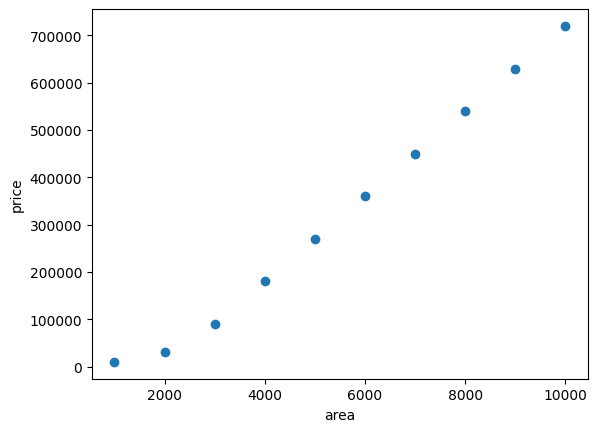

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

data_set = {"area":[1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000],
            "luxperc":[15, 20, 25, 30, 35, 40, 45, 50, 55, 60],
            "price":[10000, 30000, 90000, 180000, 270000,
                     360000, 450000, 540000, 630000, 720000]}
df = pd.DataFrame(data_set)

x = np.array(df[["area", "luxperc"]])
y = np.array(df["price"])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4)
model= LinearRegression()
model.fit(x_train, y_train)

acc = model.score(x_test, y_test)
print(f'arcuracy:{acc}')
prediction = model.predict(x_test)
for i, pred in enumerate(prediction):
  print(round(pred, 2), "--", y_test[i])

pred = model.predict([[2500, 20]])
print(pred[0])

plt.scatter(df["area"], df["price"])
plt.xlabel("area")
plt.ylabel("price")
plt.show()

0.9776246362403036

30.296781189514746 -- 30.2
30.435948252763044 -- 30.0
30.784895645463596 -- 30.3
30.83128466654637 -- 31.0
31.972277866253304 -- 32.1
33.20673559784562 -- 33.5
34.72090043537429 -- 35.0
36.258603028304265 -- 36.0
37.493747249616455 -- 36.7
37.26180214420262 -- 37.0
37.19256185743839 -- 36.8
36.6573718906869 -- 36.0
    temp  prevtemp  prevprevtemp  futuretemp  predictedtemp
0   30.0       NaN           NaN        31.3            NaN
1   30.5      30.0           NaN        32.5            NaN
2   31.3      30.5          30.0        33.7            NaN
3   32.5      31.3          30.5        35.0            NaN
4   33.7      32.5          31.3        36.1            NaN
5   35.0      33.7          32.5        36.9            NaN
6   36.1      35.0          33.7        37.5            NaN
7   36.9      36.1          35.0        37.8            NaN
8   37.5      36.9          36.1        37.9            NaN
9   37.8      37.5          36.9        37.5            NaN
10 

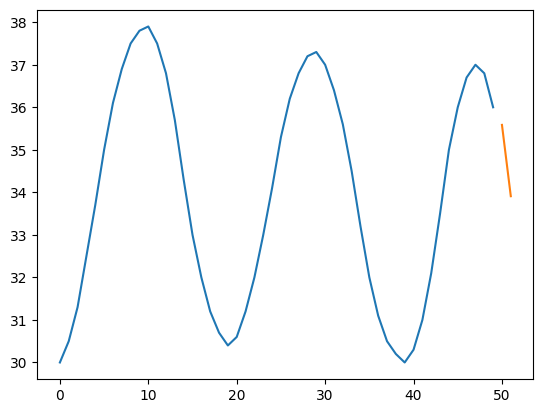

In [7]:
"""'''prediction with past, future data'''"""
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt

dataset= {"temp": [30.0, 30.5, 31.3, 32.5, 33.7, 35.0, 36.1, 36.9, 37.5, 37.8,
 37.9, 37.5, 36.8, 35.7, 34.3, 33.0, 32.0, 31.2, 30.7, 30.4,
 30.6, 31.2, 32.0, 33.0, 34.1, 35.3, 36.2, 36.8, 37.2, 37.3,
 37.0, 36.4, 35.6, 34.5, 33.2, 32.0, 31.1, 30.5, 30.2, 30.0,
 30.3, 31.0, 32.1, 33.5, 35.0, 36.0, 36.7, 37.0, 36.8, 36.0]
}
df= pd.DataFrame(dataset)
predicted_day= 2
df["prevtemp"]= df["temp"].shift(1)
df["prevprevtemp"]= df["temp"].shift(2)
df["futuretemp"]= df["temp"].shift(-predicted_day)
training_df= df.dropna()
x= np.array(training_df[["temp", "prevtemp"]])
y= np.array(training_df["futuretemp"])
x_train, x_test, y_train, y_test= train_test_split(x, y, shuffle= False)

model= LinearRegression()
model.fit(x_train, y_train)
acc= model.score(x_test, y_test)
print(acc, end= '\n\n')
predict= model.predict(x_test)
for i, pred in enumerate(predict):
  print(pred, "--", y_test[i])
x_lately= np.array(df[["temp", "prevtemp"]].tail(predicted_day))
prediction= model.predict(x_lately)
df["predictedtemp"]= np.nan
df.loc[len(df)]= [np.nan, np.nan, np.nan, np.nan, prediction[0]]
df.loc[len(df)]= [np.nan, np.nan, np.nan, np.nan, prediction[1]]
print(df)
plt.plot(df[["temp", "predictedtemp"]])
plt.show()


# POLYNOMIAL REGRESSION

1.0
22.000000000000007 -- 22
129.99999999999997 -- 130
[1638.]


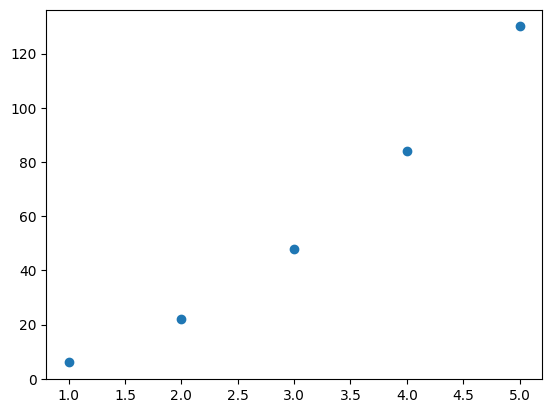

In [8]:
"""'''  DEGREE 2  '''"""
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from matplotlib import pyplot as plt

"""'''y= x+ 5x^2'''"""
data= {"x":[1, 2, 3, 4 ,5], "y":[6, 22, 48, 84, 130]}
df= pd.DataFrame(data)

x= np.array(df[["x"]])
y= np.array(df["y"])

poly_model= PolynomialFeatures(degree= 2)
x_poly= poly_model.fit_transform(x)
x_train, x_test, y_train, y_test= train_test_split(x_poly, y, test_size= 2)
model= LinearRegression()
model.fit(x_train, y_train)

acc= model.score(x_test, y_test)
print(acc)
predict= model.predict(x_test)

for i, pred in enumerate(predict):
  print(pred, "--", y_test[i])
own_input= np.array([[18]])
x= poly_model.transform(own_input)
prediction= model.predict(x)
print(prediction)
y_pred= model.predict(x)
plt.scatter(df["x"], df["y"])
plt.show()


In [9]:
"""'''Failure'''"""
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from matplotlib import pyplot as plt

"""'''y= 2x+ 5x^2+ 3y+ 4y^2
      degree= 2'''"""
data= {"x": [15, 4, 7, np.nan, 53, 37, 83, 25, 46, 98],
       "y": [18, 5, 27, 73, 83, 67, 92, 8, 16, 72],
       "t": ["low", "low", "high", "medium", "low",
             "high", "medium", "medium", "high", "low"],
       "z": [2505, 203, 3256, 25411, 41856, 25076, 68643, 3455, 11644, 69168]}
df= pd.DataFrame(data)
df["x"]= df["x"].fillna(df["x"].mean())
print(df)
x1= df[["x", "y"]]
encoder= OneHotEncoder(sparse_output= False)
x2= encoder.fit_transform(df[["t"]])
x= np.concatenate((x1, x2), axis= 1)
y= np.array(df["z"])

poly_model= PolynomialFeatures(degree= 2)
x_poly= poly_model.fit_transform(x)
x_train, x_test, y_train, y_test= train_test_split(x_poly, y)
model= LinearRegression()
model.fit(x_train, y_train)

acc= model.score(x_test, y_test)
print(acc)
prediction= model.predict(x_test)
for i, pred in enumerate(prediction):
  print(pred, "--", y_test[i])
input1= np.array([[67, 76]])
input2_df = pd.DataFrame([["high"]], columns=["t"])
input2= encoder.transform(input2_df)
user_input= np.concatenate((input1, input2), axis= 1)
x= poly_model.transform(user_input)
predict= model.predict(x)
print(predict)


           x   y       t      z
0  15.000000  18     low   2505
1   4.000000   5     low    203
2   7.000000  27    high   3256
3  40.888889  73  medium  25411
4  53.000000  83     low  41856
5  37.000000  67    high  25076
6  83.000000  92  medium  68643
7  25.000000   8  medium   3455
8  46.000000  16    high  11644
9  98.000000  72     low  69168
0.9741002767663413
69021.84447648315 -- 69168
66983.21774885428 -- 68643
38715.810220242456 -- 41856
[48767.40188019]


# LOGISTIC REGRESSION

In [10]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

dataset= {"age": [18, 20, 22, 17, 25, 18, 30, 45,
                  42, 37, 19, 20, 23, 47, 27, 20, 29],
          "level": [76, 30, 131, 90, 100, 65, 150, 110,
                    200, 80, 120, 85, 150, 75, 111, 100, 160],
          "diabetes": [0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1]}
df= pd.DataFrame(dataset)
x= np.array(df[["age", "level"]])
y= np.array(df["diabetes"])
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.1)
model= LogisticRegression()
model.fit(x_train, y_train)

acc= model.score(x_test, y_test)
print(acc)
prediction= model.predict(x_test)
for i, pred in enumerate(prediction):
  print(x_test[i], "--", pred, "--", y_test[i])

own_input= [[40, 150], [28, 100]]
predict= model.predict(own_input)
print(predict)

1.0
[ 27 111] -- 0 -- 0
[ 25 100] -- 0 -- 0
[1 0]


In [11]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

x, y= make_classification(n_samples= 200, n_features= 3, n_informative= 3,
                          n_redundant= 0, n_classes= 2, n_clusters_per_class= 1, random_state= 42)
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 10)

model= LogisticRegression()
model.fit(x_train, y_train)

acc= model.score(x_test, y_test)
print(acc)
prediction= model.predict(x_test)
for i, pred in enumerate(prediction):
  print(pred, "--", y_test[i])

1.0
1 -- 1
1 -- 1
1 -- 1
0 -- 0
1 -- 1
1 -- 1
0 -- 0
0 -- 0
0 -- 0
0 -- 0


# K_NEAREST NEIGHBORS

In [22]:
"""'''K_NEAREST NEIGHBORS WORKING'''"""

import numpy as np
import pandas as pd
from math import sqrt
from collections import Counter
import warnings
from matplotlib import pyplot as plt
from sklearn.preprocessing import OneHotEncoder

def train_test_split(x, y, test_size, shuffle= True):
  x= np.array(x)
  y= np.array(y)
  if test_size > 1:
    test_size= int(test_size* len(x))
  if shuffle== True:
    indices= np.arange(len(x))
    np.random.shuffle(indices)
    x= x[indices]
    y= y[indices]
  test_size= int(len(x)* (1- test_size))
  x_train= x[:test_size]
  x_test= x[test_size:]
  y_train= y[:test_size]
  y_test= y[test_size:]
  return x_train, x_test, y_train, y_test

class KNeighborsClassifier:
  def __init__(self, n_neighbors):
    self.k= n_neighbors
    self.x_train= None
    self.y_train= None

  def fit(self, x_train, y_train):
    self.x_train= x_train
    self.y_train= y_train

  def eucl_dist(self, x1, x2):
    return np.linalg.norm(np.array(x1)- np.array(x2))

  def predict(self, x_test):
    predictions= []
    x_test= np.array(x_test)
    for test_point in x_test:
      distances= [(self.eucl_dist(test_point, train_point), train_label) for train_point, train_label in zip(self.x_train, self.y_train)]
      neighbors= sorted(distances)[:self.k]
      labels= [label for _ , label in neighbors]
      most_common= Counter(labels).most_common(1)[0][0]
      predictions.append(most_common)
    return np.array(predictions)

  def score(self, x_test, y_test):
    y_pred= self.predict(x_test)
    correct= sum(1 for yp, yt in zip(y_pred, y_test) if yp== yt)
    return correct/ len(y_test)

dataset = {"size": [20, 5, 75, 20, 80, 5, 20.3, 4.92, 74.8, 19.6, 80.9,
                    5.1, 19.8, 5.3, 75.2, 20.1, 79.7, 4.87, 20.4, 6.32],
           "weight": [30, 9, 100, 35, 90, 10, 30.4, 9.1, 99.2, 34.6, 89.3,
                      10.5, 29.7, 9.2, 100.6, 35.1, 91.2, 10.3, 30.8, 10.7],
           "color": ["red", "green", "green", "orange", "orange", "blue","red",
                     "green", "green", "orange", "orange", "blue","red", "green",
                     "green", "orange", "orange", "blue", "red", "green"],
           "name": ["apple", "grapes", "watermelon", "orange", "papaya", "grapes",
                    "apple", "grapes", "watermelon", "orange", "papaya", "grapes",
                    "apple", "grapes", "watermelon", "orange", "papaya", "grapes",
                    "apple", "grapes"]}

df= pd.DataFrame(dataset)

encoder= OneHotEncoder(sparse_output= False)
x1= df[["size", "weight"]]
x2= encoder.fit_transform(df[["color"]])
y= np.array(df["name"])
x= np.concatenate((x1, x2), axis= 1)

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2)
model= KNeighborsClassifier(n_neighbors= 3)
model.fit(x_train, y_train)
acc= model.score(x_test, y_test)
print(acc)
prediction= model.predict(x_test)
for i, pred in enumerate(prediction):
  print(pred, "--", y_test[i])


1.0
watermelon -- watermelon
grapes -- grapes
grapes -- grapes
papaya -- papaya


0.9
0 -- 0
1 -- 1
0 -- 0
1 -- 1
1 -- 1
1 -- 1
0 -- 1
1 -- 1
1 -- 1
0 -- 0


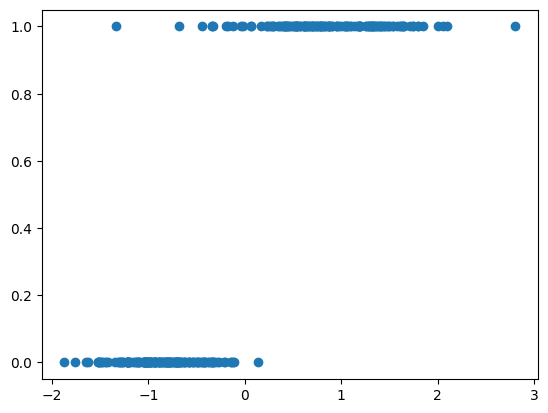

In [13]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

x, y= make_classification(n_samples= 300, n_features= 1, n_informative= 1,
                          n_redundant= 0, n_classes= 2, n_clusters_per_class= 1, random_state= 42)
scalar= StandardScaler()
x= scalar.fit_transform(x)
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 10)
model= KNeighborsClassifier(n_neighbors= 3)
model.fit(x_train, y_train)
acc= model.score(x_test, y_test)
print(acc)
prediction= model.predict(x_test)
for i, pred in enumerate(prediction):
  print(pred, "--", y_test[i])
plt.scatter(x, y)
plt.show()

     size  weight   color        name
0   20.00    30.0     red       apple
1    5.00     9.0   green      grapes
2   75.00   100.0   green  watermelon
3   20.00    35.0  orange      orange
4   80.00    90.0  orange      papaya
5    5.00    10.0    blue      grapes
6   20.30    30.4     red       apple
7    4.92     9.1   green      grapes
8   74.80    99.2   green  watermelon
9   19.60    34.6  orange      orange
10  80.90    89.3  orange      papaya
11   5.10    10.5    blue      grapes
12  19.80    29.7     red       apple
13   5.30     9.2   green      grapes
14  75.20   100.6   green  watermelon
15  20.10    35.1  orange      orange
16  79.70    91.2  orange      papaya
17   4.87    10.3    blue      grapes
18  20.40    30.8     red       apple
19   6.32    10.7   green      grapes

1.0
papaya -- papaya
watermelon -- watermelon
grapes -- grapes
grapes -- grapes
['watermelon' 'orange' 'grapes' 'apple']


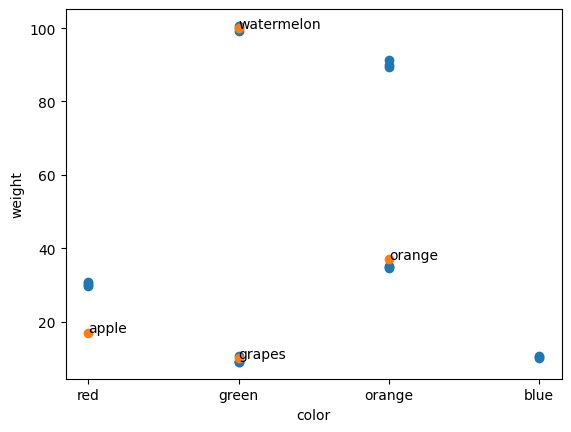

In [23]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

# data= {"size": [20, 5, 75, 20, 80, 5],
#           "weight": [30, 9, 100, 35, 90, 10],
#           "color": ["red", "green", "green", "orange", "orange", "blue"],
#           "name": ["apple", "grapes", "watermelon", "orange", "papaya", "grapes"]}
dataset = {"size": [20, 5, 75, 20, 80, 5, 20.3, 4.92, 74.8, 19.6, 80.9,
                    5.1, 19.8, 5.3, 75.2, 20.1, 79.7, 4.87, 20.4, 6.32],
           "weight": [30, 9, 100, 35, 90, 10, 30.4, 9.1, 99.2, 34.6, 89.3,
                      10.5, 29.7, 9.2, 100.6, 35.1, 91.2, 10.3, 30.8, 10.7],
           "color": ["red", "green", "green", "orange", "orange", "blue","red",
                     "green", "green", "orange", "orange", "blue","red", "green",
                     "green", "orange", "orange", "blue", "red", "green"],
           "name": ["apple", "grapes", "watermelon", "orange", "papaya", "grapes",
                    "apple", "grapes", "watermelon", "orange", "papaya", "grapes",
                    "apple", "grapes", "watermelon", "orange", "papaya", "grapes",
                    "apple", "grapes"]}
df=  pd.DataFrame(dataset)
print(df, end= "\n\n")

encoder= OneHotEncoder(sparse_output= False)
x1= df[["size", "weight"]]
x2= encoder.fit_transform(df[["color"]])
y= np.array(df["name"])
x= np.concatenate((x1, x2), axis= 1)
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2)
model= KNeighborsClassifier(n_neighbors= 3)
model.fit(x_train, y_train)

acc= model.score(x_test, y_test)
print(acc)
prediction= model.predict(x_test)
for i, pred in enumerate(prediction):
  print(pred, "--", y_test[i])
own_input= {"size": [80, 20, 5, 20], "weight": [100, 37, 10, 17], "color": ["green", "orange", "green", "red"]}
input_df = pd.DataFrame(own_input)
input1= input_df[["size", "weight"]]
input2= encoder.transform(input_df[["color"]])
user_input= np.concatenate((input1, input2), axis= 1)
prediction = model.predict(user_input)
print(prediction)
x_axis= input_df["color"]
y_axis= input_df["weight"]
name_points= prediction
plt.scatter(df["color"], df["weight"])
plt.scatter(x_axis, y_axis)
plt.xlabel("color")
plt.ylabel("weight")
for i, txt in enumerate(name_points):
  #plt.text(x_axis[i], y_axis[i], txt)
  plt.annotate(txt, (x_axis[i], y_axis[i]))
plt.show()

# DECISION_TREE

0.9
0 -- 0
1 -- 1
1 -- 1
1 -- 1
1 -- 1
0 -- 1
1 -- 1
0 -- 0
0 -- 0
1 -- 1


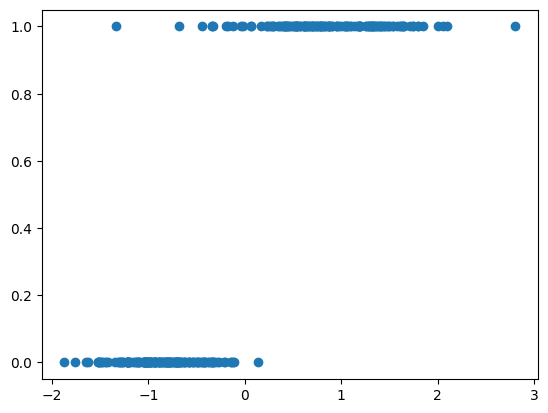

In [24]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

x, y= make_classification(n_samples= 300, n_features= 1, n_informative= 1,
                          n_redundant= 0, n_classes= 2, n_clusters_per_class= 1, random_state= 42)
scalar= StandardScaler()
x= scalar.fit_transform(x)
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 10)
model= DecisionTreeClassifier()
model.fit(x_train, y_train)
acc= model.score(x_test, y_test)
print(acc)
prediction= model.predict(x_test)
for i, pred in enumerate(prediction):
  print(pred, "--", y_test[i])
plt.scatter(x, y)
plt.show()

     size  weight   color        name
0   20.00    30.0     red       apple
1    5.00     9.0   green      grapes
2   75.00   100.0   green  watermelon
3   20.00    35.0  orange      orange
4   80.00    90.0  orange      papaya
5    5.00    10.0    blue      grapes
6   20.30    30.4     red       apple
7    4.92     9.1   green      grapes
8   74.80    99.2   green  watermelon
9   19.60    34.6  orange      orange
10  80.90    89.3  orange      papaya
11   5.10    10.5    blue      grapes
12  19.80    29.7     red       apple
13   5.30     9.2   green      grapes
14  75.20   100.6   green  watermelon
15  20.10    35.1  orange      orange
16  79.70    91.2  orange      papaya
17   4.87    10.3    blue      grapes
18  20.40    30.8     red       apple
19   6.32    10.7   green      grapes

1.0
papaya -- papaya
grapes -- grapes
orange -- orange
grapes -- grapes
['watermelon' 'orange' 'grapes' 'grapes']


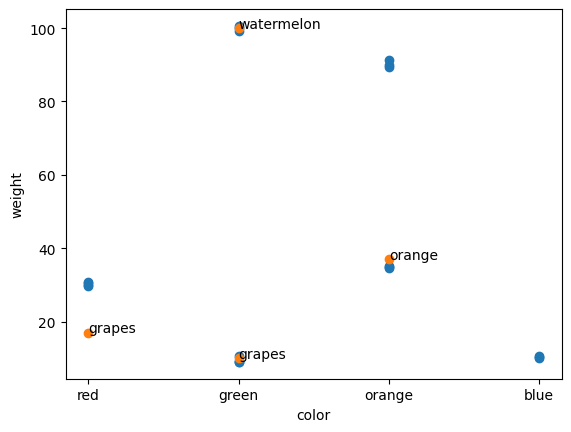

In [16]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

# data= {"size": [20, 5, 75, 20, 80, 5],
#           "weight": [30, 9, 100, 35, 90, 10],
#           "color": ["red", "green", "green", "orange", "orange", "blue"],
#           "name": ["apple", "grapes", "watermelon", "orange", "papaya", "grapes"]}
dataset = {"size": [20, 5, 75, 20, 80, 5, 20.3, 4.92, 74.8, 19.6, 80.9,
                    5.1, 19.8, 5.3, 75.2, 20.1, 79.7, 4.87, 20.4, 6.32],
           "weight": [30, 9, 100, 35, 90, 10, 30.4, 9.1, 99.2, 34.6, 89.3,
                      10.5, 29.7, 9.2, 100.6, 35.1, 91.2, 10.3, 30.8, 10.7],
           "color": ["red", "green", "green", "orange", "orange", "blue","red",
                     "green", "green", "orange", "orange", "blue","red", "green",
                     "green", "orange", "orange", "blue", "red", "green"],
           "name": ["apple", "grapes", "watermelon", "orange", "papaya", "grapes",
                    "apple", "grapes", "watermelon", "orange", "papaya", "grapes",
                    "apple", "grapes", "watermelon", "orange", "papaya", "grapes",
                    "apple", "grapes"]}
df=  pd.DataFrame(dataset)
print(df, end= "\n\n")

encoder= OneHotEncoder(sparse_output= False)
x1= df[["size", "weight"]]
x2= encoder.fit_transform(df[["color"]])
y= np.array(df["name"])
x= np.concatenate((x1, x2), axis= 1)
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2)
model= DecisionTreeClassifier()
model.fit(x_train, y_train)

acc= model.score(x_test, y_test)
print(acc)
prediction= model.predict(x_test)
for i, pred in enumerate(prediction):
  print(pred, "--", y_test[i])
own_input= {"size": [80, 20, 5, 20], "weight": [100, 37, 10, 17], "color": ["green", "orange", "green", "red"]}
input_df = pd.DataFrame(own_input)
input1= input_df[["size", "weight"]]
input2= encoder.transform(input_df[["color"]])
user_input= np.concatenate((input1, input2), axis= 1)
prediction = model.predict(user_input)
print(prediction)
x_axis= input_df["color"]
y_axis= input_df["weight"]
name_points= prediction
plt.scatter(df["color"], df["weight"])
plt.scatter(x_axis, y_axis)
plt.xlabel("color")
plt.ylabel("weight")
for i, txt in enumerate(name_points):
  #plt.text(x_axis[i], y_axis[i], txt)
  plt.annotate(txt, (x_axis[i], y_axis[i]))
plt.show()

In [17]:
"""'''gpt dtree'''"""
import numpy as np
from collections import Counter

def gini_impurity(y):
    counts = Counter(y)
    impurity = 1
    total = len(y)
    for lbl in counts:
        prob = counts[lbl] / total
        impurity -= prob**2
    return impurity

def split_dataset(X, y, feature_index, threshold):
    left_mask = X[:, feature_index] <= threshold
    right_mask = ~left_mask
    return X[left_mask], y[left_mask], X[right_mask], y[right_mask]

def best_split(X, y):
    best_feature, best_threshold = None, None
    best_impurity = 1
    n_features = X.shape[1]

    for feature_index in range(n_features):
        thresholds = np.unique(X[:, feature_index])
        for threshold in thresholds:
            X_left, y_left, X_right, y_right = split_dataset(X, y, feature_index, threshold)
            if len(y_left) == 0 or len(y_right) == 0:
                continue
            impurity_left = gini_impurity(y_left)
            impurity_right = gini_impurity(y_right)
            weighted_impurity = (len(y_left)*impurity_left + len(y_right)*impurity_right) / len(y)

            if weighted_impurity < best_impurity:
                best_impurity = weighted_impurity
                best_feature = feature_index
                best_threshold = threshold
    return best_feature, best_threshold

class DecisionTreeNode:
    def __init__(self, feature=None, threshold=None, left=None, right=None, *, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

class DecisionTreeClassifierScratch:
    def __init__(self, max_depth=5, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.root = None

    def fit(self, X, y):
        self.root = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        num_samples = len(y)
        num_classes = len(set(y))

        if (depth >= self.max_depth or num_samples < self.min_samples_split or num_classes == 1):
            leaf_value = self._most_common_label(y)
            return DecisionTreeNode(value=leaf_value)

        feature, threshold = best_split(X, y)
        if feature is None:
            leaf_value = self._most_common_label(y)
            return DecisionTreeNode(value=leaf_value)

        X_left, y_left, X_right, y_right = split_dataset(X, y, feature, threshold)
        left_child = self._grow_tree(X_left, y_left, depth+1)
        right_child = self._grow_tree(X_right, y_right, depth+1)
        return DecisionTreeNode(feature, threshold, left_child, right_child)

    def _most_common_label(self, y):
        return Counter(y).most_common(1)[0][0]

    def predict(self, X):
        return np.array([self._predict(inputs, self.root) for inputs in X])

    def _predict(self, inputs, node):
        if node.value is not None:
            return node.value
        if inputs[node.feature] <= node.threshold:
            return self._predict(inputs, node.left)
        else:
            return self._predict(inputs, node.right)

    def score(self, X, y):
        y_pred = self.predict(X)
        return np.mean(y_pred == y)


# RANDOM_FOREST


     size  weight   color        name
0   20.00    30.0     red       apple
1    5.00     9.0   green      grapes
2   75.00   100.0   green  watermelon
3   20.00    35.0  orange      orange
4   80.00    90.0  orange      papaya
5    5.00    10.0    blue      grapes
6   20.30    30.4     red       apple
7    4.92     9.1   green      grapes
8   74.80    99.2   green  watermelon
9   19.60    34.6  orange      orange
10  80.90    89.3  orange      papaya
11   5.10    10.5    blue      grapes
12  19.80    29.7     red       apple
13   5.30     9.2   green      grapes
14  75.20   100.6   green  watermelon
15  20.10    35.1  orange      orange
16  79.70    91.2  orange      papaya
17   4.87    10.3    blue      grapes
18  20.40    30.8     red       apple
19   6.32    10.7   green      grapes

1.0
grapes -- grapes
grapes -- grapes
apple -- apple
grapes -- grapes
['watermelon' 'orange' 'grapes' 'apple']


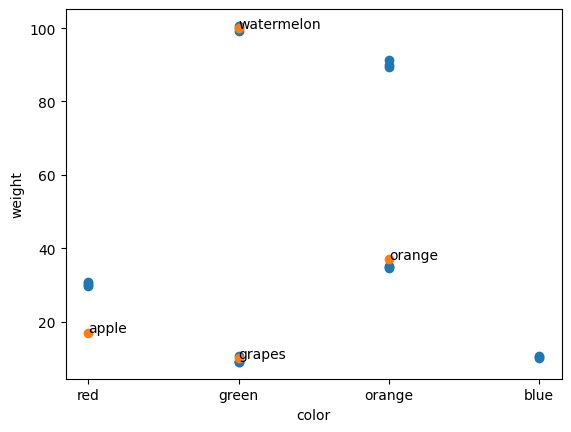

In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

dataset = {"size": [20, 5, 75, 20, 80, 5, 20.3, 4.92, 74.8, 19.6, 80.9,
                    5.1, 19.8, 5.3, 75.2, 20.1, 79.7, 4.87, 20.4, 6.32],
           "weight": [30, 9, 100, 35, 90, 10, 30.4, 9.1, 99.2, 34.6, 89.3,
                      10.5, 29.7, 9.2, 100.6, 35.1, 91.2, 10.3, 30.8, 10.7],
           "color": ["red", "green", "green", "orange", "orange", "blue","red",
                     "green", "green", "orange", "orange", "blue","red", "green",
                     "green", "orange", "orange", "blue", "red", "green"],
           "name": ["apple", "grapes", "watermelon", "orange", "papaya", "grapes",
                    "apple", "grapes", "watermelon", "orange", "papaya", "grapes",
                    "apple", "grapes", "watermelon", "orange", "papaya", "grapes",
                    "apple", "grapes"]}
df=  pd.DataFrame(dataset)
print(df, end= "\n\n")

encoder= OneHotEncoder(sparse_output= False)
x1= df[["size", "weight"]]
x2= encoder.fit_transform(df[["color"]])
y= np.array(df["name"])
x= np.concatenate((x1, x2), axis= 1)
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2)

model= RandomForestClassifier(n_estimators= 100, max_depth= None, random_state= 42)
model.fit(x_train, y_train)
accuracy= model.score(x_test, y_test)
print(accuracy)
prediction= model.predict(x_test)
for i, pred in enumerate(prediction):
  print(pred, "--", y_test[i])

own_input= {"size": [80, 20, 5, 20], "weight": [100, 37, 10, 17], "color": ["green", "orange", "green", "red"]}
input_df = pd.DataFrame(own_input)
input1= input_df[["size", "weight"]]
input2= encoder.transform(input_df[["color"]])
user_input= np.concatenate((input1, input2), axis= 1)
prediction = model.predict(user_input)
print(prediction)
x_axis= input_df["color"]
y_axis= input_df["weight"]
name_points= prediction
plt.scatter(df["color"], df["weight"])
plt.scatter(x_axis, y_axis)
plt.xlabel("color")
plt.ylabel("weight")
for i, txt in enumerate(name_points):
  #plt.text(x_axis[i], y_axis[i], txt)
  plt.annotate(txt, (x_axis[i], y_axis[i]))
plt.show()